In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [66]:
sns.set()
sns.set(style="ticks")


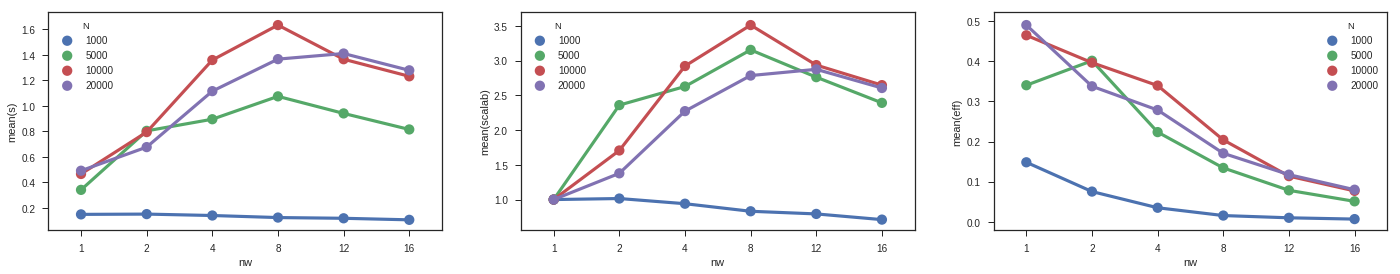

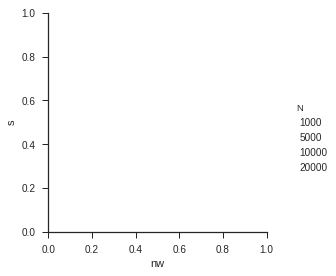

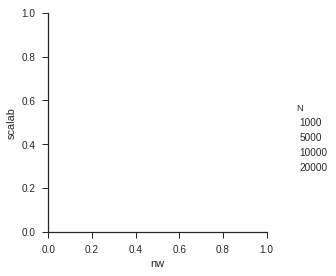

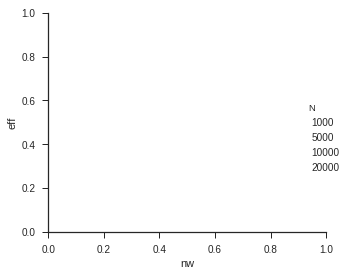

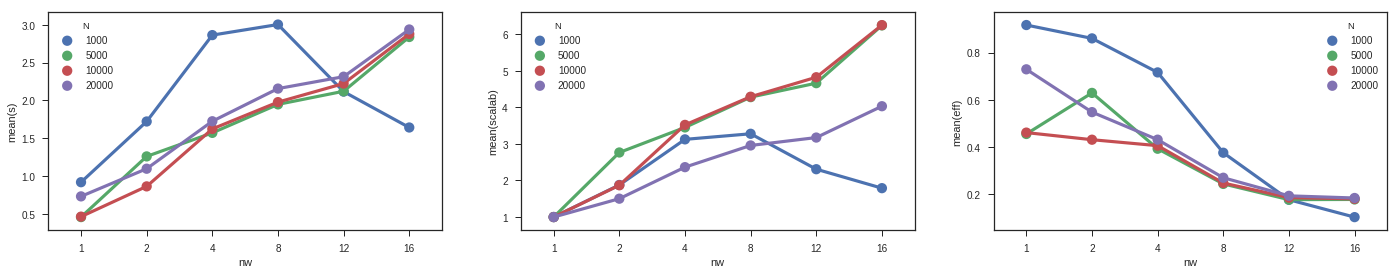

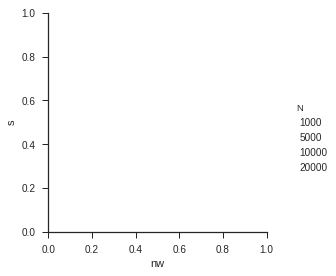

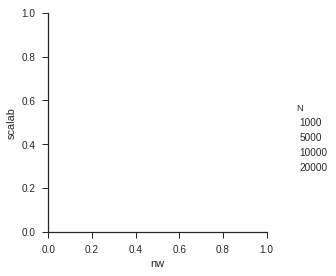

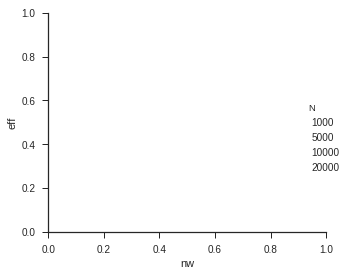

In [67]:
results = []

compl_seq = pd.DataFrame()
compl_ff = pd.DataFrame()
compl_pt = pd.DataFrame()

for i in [1000, 5000, 10000, 20000]:
    df_seq = pd.read_csv("results/res_seq_" + str(i) + ".csv", delimiter=' *, *', engine='python')
    df_ff = pd.read_csv("results/res_ff_" + str(i) +".csv", delimiter=' *, *', engine='python')
    df_pt = pd.read_csv("results/res_pt_" + str(i) + ".csv", delimiter=' *, *', engine='python' )

    seq_time = df_seq['time'][0]
    ff_time_0 = df_ff.loc[df_ff['nw'] == 1]['time'][0]
    pt_time_0 = df_pt.loc[df_pt['nw'] == 1]['time'][0]
    
    df_seq['N'] = df_seq.apply(lambda row: i, axis=1)
    
    df_ff['N'] = df_ff.apply(lambda row: i, axis=1)
    df_ff['s'] = df_ff.apply(lambda row: seq_time/row['time'], axis=1)
    df_ff['scalab'] = df_ff.apply(lambda row: ff_time_0/row['time'], axis=1)
    df_ff['eff'] = df_ff.apply(lambda row: row['s']/row['nw'], axis=1)
    
    df_pt['N'] = df_pt.apply(lambda row: i, axis = 1)
    df_pt['s'] = df_pt.apply(lambda row: seq_time/row['time'], axis=1)
    df_pt['scalab'] = df_pt.apply(lambda row: pt_time_0/row['time'], axis=1)
    df_pt['eff'] = df_pt.apply(lambda row: row['s']/row['nw'], axis=1)

    compl_seq = compl_seq.append(df_seq, ignore_index=True)
    compl_ff = compl_ff.append(df_ff, ignore_index=True)
    compl_pt = compl_pt.append(df_pt, ignore_index=True)

fig, axs = plt.subplots(ncols=3)
sns.factorplot(x='nw', y='s', data=compl_ff, hue='N', ax=axs[0])
sns.factorplot(x='nw', y='scalab', data=compl_ff, hue='N', ax=axs[1])
sns.factorplot(x='nw', y='eff', data=compl_ff, hue='N', ax=axs[2])

fig.set_size_inches(24, 4)
plt.tight_layout()

fig, axs = plt.subplots(ncols=3)
sns.factorplot(x='nw', y='s', data=compl_pt, hue='N', ax=axs[0])
sns.factorplot(x='nw', y='scalab', data=compl_pt, hue='N', ax=axs[1])
sns.factorplot(x='nw', y='eff', data=compl_pt, hue='N', ax=axs[2])

fig.set_size_inches(24, 4)
plt.tight_layout()